# Extract the data from MiniO landing zone bucket

In [1]:
import pandas as pd
import io
from minio import Minio
import os

FILE_NAME = "Recintos_Almendros_Cercanos_y_Otros_Cultivos.xlsx"


ACCESS_ROOT = os.environ.get("PREFECT_MINIO_ACCESS_ROOT")
SECRET_ROOT = os.environ.get("PREFECT_MINIO_SECRET_ROOT")
MINIO_HOST = os.environ.get("PREFECT_MINIO_HOST")
minio_client = Minio(MINIO_HOST, access_key=ACCESS_ROOT,
                     secret_key=SECRET_ROOT, secure=False)

# Get pistacho.json from MinIO and deserialize it
data = minio_client.get_object(
    "landing-zone", FILE_NAME).read()
df = pd.read_excel(io.BytesIO(data), engine="openpyxl",
                   sheet_name="Tratamientos")
df2 = pd.read_excel(io.BytesIO(data), engine="openpyxl",
                    sheet_name="Parcelas")


In [2]:
df.head()  # first 5 rows
df.tail()  # last 5 rows
df.columns  # list all column names


Index(['MovimientoCosecha', 'MovimientoFechaDeInicio', 'Producto',
       'ProductoNombre', 'Formulado', 'TratamientosPlagaEfectosEnPlagasId',
       'EfectosEnPlagas', 'TratamientosPlagaMalasHierbasId', 'SecUserNombre',
       'SecUserNIF', 'SecUserId', 'ParcelaProvinciaId', 'ParcelaMunicipioId',
       'ParcelaPoligono', 'Parcela', 'ParcelaRecinto', 'ParcelaParaje',
       'ParcelaAgregado', 'ParcelaZona', 'ParcelaCosechaCodigoPAC',
       'ParcelaCosechaCultivoPAC', 'Caldo', 'TipoDeDosisId',
       'TipoDeDosisDetalle', 'MovimientoParcelaSuperficieTratada', 'Cantidad',
       'MovimientoPlazoDeSeguridad', 'MovimientoDosis',
       'ParcelaSuperficieCultivo', 'ParcelaSuperficieSIGPAC',
       'ParcelaZonaVulnerable', 'UsoDeParcelasId'],
      dtype='object')

In [3]:
df.info()  # additional info about dataframe
df.describe()  # statistical description, only for numeric values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MovimientoCosecha                   792 non-null    int64  
 1   MovimientoFechaDeInicio             792 non-null    object 
 2   Producto                            774 non-null    object 
 3   ProductoNombre                      792 non-null    object 
 4   Formulado                           792 non-null    object 
 5   TratamientosPlagaEfectosEnPlagasId  792 non-null    int64  
 6   EfectosEnPlagas                     792 non-null    object 
 7   TratamientosPlagaMalasHierbasId     0 non-null      float64
 8   SecUserNombre                       792 non-null    object 
 9   SecUserNIF                          792 non-null    object 
 10  SecUserId                           792 non-null    int64  
 11  ParcelaProvinciaId                  792 non-n

,MovimientoCosecha,TratamientosPlagaEfectosEnPlagasId,TratamientosPlagaMalasHierbasId,SecUserId,ParcelaProvinciaId,ParcelaMunicipioId,ParcelaPoligono,Parcela,ParcelaZona,ParcelaCosechaCodigoPAC,Caldo,TipoDeDosisId,MovimientoParcelaSuperficieTratada,Cantidad,MovimientoDosis,ParcelaSuperficieCultivo,ParcelaSuperficieSIGPAC,ParcelaZonaVulnerable
count,792.0,7.920000e+02,0.0,7.920000e+02,792.0,792.000000,792.000000,792.000000,792.0,792.000000,751.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,2022.0,2.500000e+11,NaN,9.010464e+17,50.0,164.678030,10.104798,208.500000,0.0,70.651515,441.145140,5.078283,0.648487,0.639950,7.531626,0.648487,0.662646,0.345960
std,0.0,2.863189e+12,NaN,0.000000e+00,0.0,66.355752,10.754137,248.384912,0.0,52.743371,485.020433,1.758183,0.991549,1.913093,26.174957,0.991549,0.987496,0.475981
min,2022.0,1.000000e+00,NaN,9.010464e+17,50.0,68.000000,1.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.010000,0.000001,0.010000,0.010000,0.000000,0.000000
25%,2022.0,2.800000e+01,NaN,9.010464e+17,50.0,99.000000,1.000000,40.000000,0.0,8.000000,0.000000,5.000000,0.260000,0.000922,0.080000,0.260000,0.290000,0.000000
50%,2022.0,1.680000e+02,NaN,9.010464e+17,50.0,151.000000,7.000000,108.500000,0.0,60.000000,0.000000,5.000000,0.435000,0.027000,0.500000,0.435000,0.480000,0.000000
75%,2022.0,1.940000e+02,NaN,9.010464e+17,50.0,230.000000,16.000000,234.000000,0.0,109.000000,1000.000000,6.000000,0.680000,0.329512,3.000000,0.680000,0.680000,1.000000
max,2022.0,3.300000e+13,NaN,9.010464e+17,50.0,274.000000,35.000000,1193.000000,0.0,250.000000,1000.000000,10.000000,11.060000,22.120000,240.000000,11.060000,11.060000,1.000000


# Check missing values

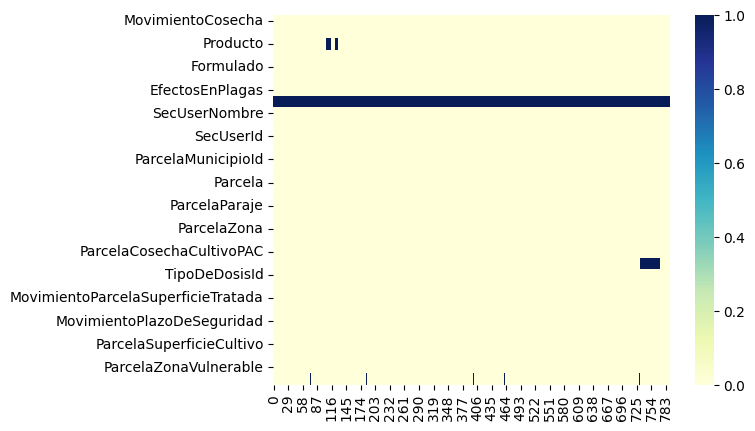

In [10]:
import seaborn as sns

# visualization For data missing
sns.heatmap(df.isna().transpose(),cmap="YlGnBu"); 